In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

2023-04-26 17:58:55.633649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Define data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/train', target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory('data/test', target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [4]:
# Load the pre-trained ResNet50 model and remove the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

2023-04-26 00:37:30.740657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# Add new top layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

In [7]:
# Create the final model by combining base and top layers
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
# Compile the model
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/Users/anujshah/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:
# Train the model
history = model.fit(train_generator, epochs=10, steps_per_epoch=61, validation_data=val_generator, validation_steps=1)


Epoch 1/10
61/61 [==============================] - 128s 2s/step - loss: 1.4155 - accuracy: 0.3983 - val_loss: 1.1652 - val_accuracy: 0.5556
Epoch 2/10
61/61 [==============================] - 126s 2s/step - loss: 1.1838 - accuracy: 0.5110 - val_loss: 1.0522 - val_accuracy: 0.5556
Epoch 3/10
61/61 [==============================] - 148s 2s/step - loss: 1.0825 - accuracy: 0.5541 - val_loss: 0.9531 - val_accuracy: 0.6111
Epoch 4/10
61/61 [==============================] - 147s 2s/step - loss: 0.9127 - accuracy: 0.6571 - val_loss: 0.9920 - val_accuracy: 0.6111
Epoch 5/10
61/61 [==============================] - 152s 2s/step - loss: 0.8828 - accuracy: 0.6612 - val_loss: 0.8542 - val_accuracy: 0.6111
Epoch 6/10
61/61 [==============================] - 136s 2s/step - loss: 0.8304 - accuracy: 0.6827 - val_loss: 0.8867 - val_accuracy: 0.6111
Epoch 7/10
61/61 [==============================] - 149s 2s/step - loss: 0.8228 - accuracy: 0.6668 - val_loss: 0.9684 - val_accuracy: 0.6111
Epoch 8/10
61

In [11]:
# Save the trained model
model.save('plant_disease_detection_resnet50.h5')

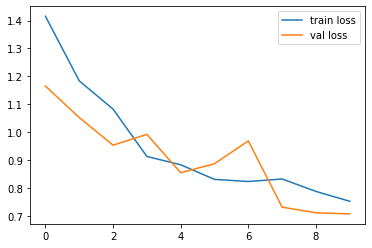

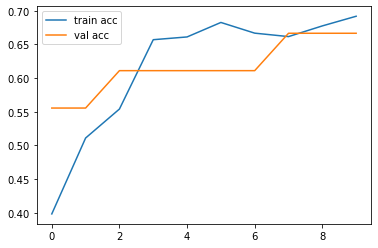

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
# Load the saved model
from keras.models import load_model
model = load_model('plant_disease_detection_resnet50.h5')

# Evaluate the model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data/test', target_size=(224, 224), batch_size=1, class_mode='categorical', shuffle=False)
loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)

Found 18 images belonging to 4 classes.
18/18 [==============================] - 4s 181ms/step - loss: 0.7066 - accuracy: 0.6667
Test accuracy: 0.6666666865348816


In [13]:
from sklearn.metrics import classification_report

In [15]:
# Make predictions on the test data
test_pred = model.predict(test_generator)

# Get the predicted class labels
test_pred_labels = np.argmax(test_pred, axis=1)

# Get the true class labels
test_true_labels = test_generator.classes

18/18 [==============================] - 3s 181ms/step


In [16]:
# Print the classification report
print("*** Resnet50 ***")
print(classification_report(test_true_labels, test_pred_labels))

*** Resnet50 ***
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.75      0.60      0.67         5
           2       1.00      1.00      1.00         5
           3       0.43      0.60      0.50         5

    accuracy                           0.67        18
   macro avg       0.67      0.63      0.64        18
weighted avg       0.69      0.67      0.67        18



In [1]:
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
# Load the saved model
model = load_model('plant_disease_detection_resnet50.h5')

2023-04-26 18:00:15.245554: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data/test', target_size=(224, 224), batch_size=1, class_mode='categorical', shuffle=False)
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

Found 18 images belonging to 4 classes.
18/18 [==============================] - 4s 181ms/step


In [9]:
# Create and display the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

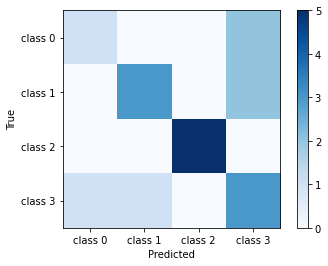

In [10]:
# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(4), ['class 0', 'class 1', 'class 2', 'class 3'])
plt.yticks(np.arange(4), ['class 0', 'class 1', 'class 2', 'class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()